In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [31]:
cal_fire_data = pd.read_csv("../data/cal_fire_data_cleaned.csv")
cal_fire_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42789 entries, 0 to 42788
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   * Structure Type                             42789 non-null  object 
 1   * Roof Construction                          42789 non-null  object 
 2   * Eaves                                      42789 non-null  object 
 3   * Vent Screen                                42789 non-null  object 
 4   * Exterior Siding                            42789 non-null  object 
 5   * Window Pane                                42789 non-null  object 
 6   * Deck/Porch On Grade                        42789 non-null  object 
 7   * Deck/Porch Elevated                        42789 non-null  object 
 8   * Patio Cover/Carport Attached to Structure  42789 non-null  object 
 9   * Fence Attached to Structure                42789 non-null  object 
 10

In [32]:
cal_fire_data = pd.get_dummies(cal_fire_data, columns=cal_fire_data.select_dtypes('object').columns, drop_first=True)
cal_fire_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42789 entries, 0 to 42788
Data columns (total 49 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Assessed Improved Value (parcel)                                    42789 non-null  float64
 1   Latitude                                                            42789 non-null  float64
 2   Longitude                                                           42789 non-null  float64
 3   Age                                                                 42789 non-null  float64
 4   Destroyed                                                           42789 non-null  int64  
 5   * Structure Type_Commercial Building Multi Story                    42789 non-null  bool   
 6   * Structure Type_Commercial Building Single Story                   42789 non-null  bool   
 7   * Structure T

In [33]:
from sklearn.model_selection import train_test_split
fire_train, fire_test = train_test_split(cal_fire_data, test_size=0.2, shuffle=True, random_state=216, stratify=cal_fire_data['Destroyed'])
fire_train['Destroyed'].value_counts(normalize=True)


Destroyed
0    0.597616
1    0.402384
Name: proportion, dtype: float64

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector


Destroyed
0    581
1    419
Name: count, dtype: int64


In [35]:
# lr = LogisticRegression(penalty=None, max_iter=10000)
# kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=216)
# sfs = SequentialFeatureSelector(estimator=lr, cv=kfold, tol=-0.0001, direction='backward', n_jobs=-1)
# sfs.fit(fire_train.drop(columns='Destroyed')[:1000], fire_train.Destroyed[:1000])
features = fire_train.drop(columns='Destroyed').columns#[sfs.get_support()]
print(features)


Index(['Assessed Improved Value (parcel)', 'Latitude', 'Longitude', 'Age',
       '* Structure Type_Commercial Building Multi Story',
       '* Structure Type_Commercial Building Single Story',
       '* Structure Type_Hospital', '* Structure Type_Infrastructure',
       '* Structure Type_Mixed Commercial/Residential',
       '* Structure Type_Mobile Home Double Wide',
       '* Structure Type_Mobile Home Single Wide',
       '* Structure Type_Mobile Home Triple Wide',
       '* Structure Type_Motor Home',
       '* Structure Type_Multi Family Residence Multi Story',
       '* Structure Type_Multi Family Residence Single Story',
       '* Structure Type_School',
       '* Structure Type_Single Family Residence Multi Story',
       '* Structure Type_Single Family Residence Single Story',
       '* Structure Type_Utility Misc Structure',
       '* Roof Construction_Concrete', '* Roof Construction_Metal',
       '* Roof Construction_Other', '* Roof Construction_Tile',
       '* Roof Const

In [36]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

lr = LogisticRegression(penalty=None, max_iter=1000, random_state=216)
lr.fit(fire_train[features], fire_train.Destroyed)

preds = lr.predict(fire_test[features])
baseline_test_acc = accuracy_score(fire_test.Destroyed, preds)
baseline_test_balanced_acc = balanced_accuracy_score(fire_test.Destroyed, preds)
print(baseline_test_acc)
print(baseline_test_balanced_acc)


0.7768170133208694
0.770428389845065


In [37]:
probabilities = lr.predict_proba(fire_test[features])
print(probabilities)


[[0.87999954 0.12000046]
 [0.25687925 0.74312075]
 [0.27231902 0.72768098]
 ...
 [0.86576839 0.13423161]
 [0.80127789 0.19872211]
 [0.3421122  0.6578878 ]]


In [38]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [39]:
print(precision_score(fire_test.Destroyed, lr.predict(fire_test[features]), average=None))
print(recall_score(fire_test.Destroyed, lr.predict(fire_test[features]), average=None))
print(f1_score(fire_test.Destroyed, lr.predict(fire_test[features]), average=None))


[0.81979645 0.71609811]
[0.80312805 0.73772872]
[0.81137665 0.7267525 ]


In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


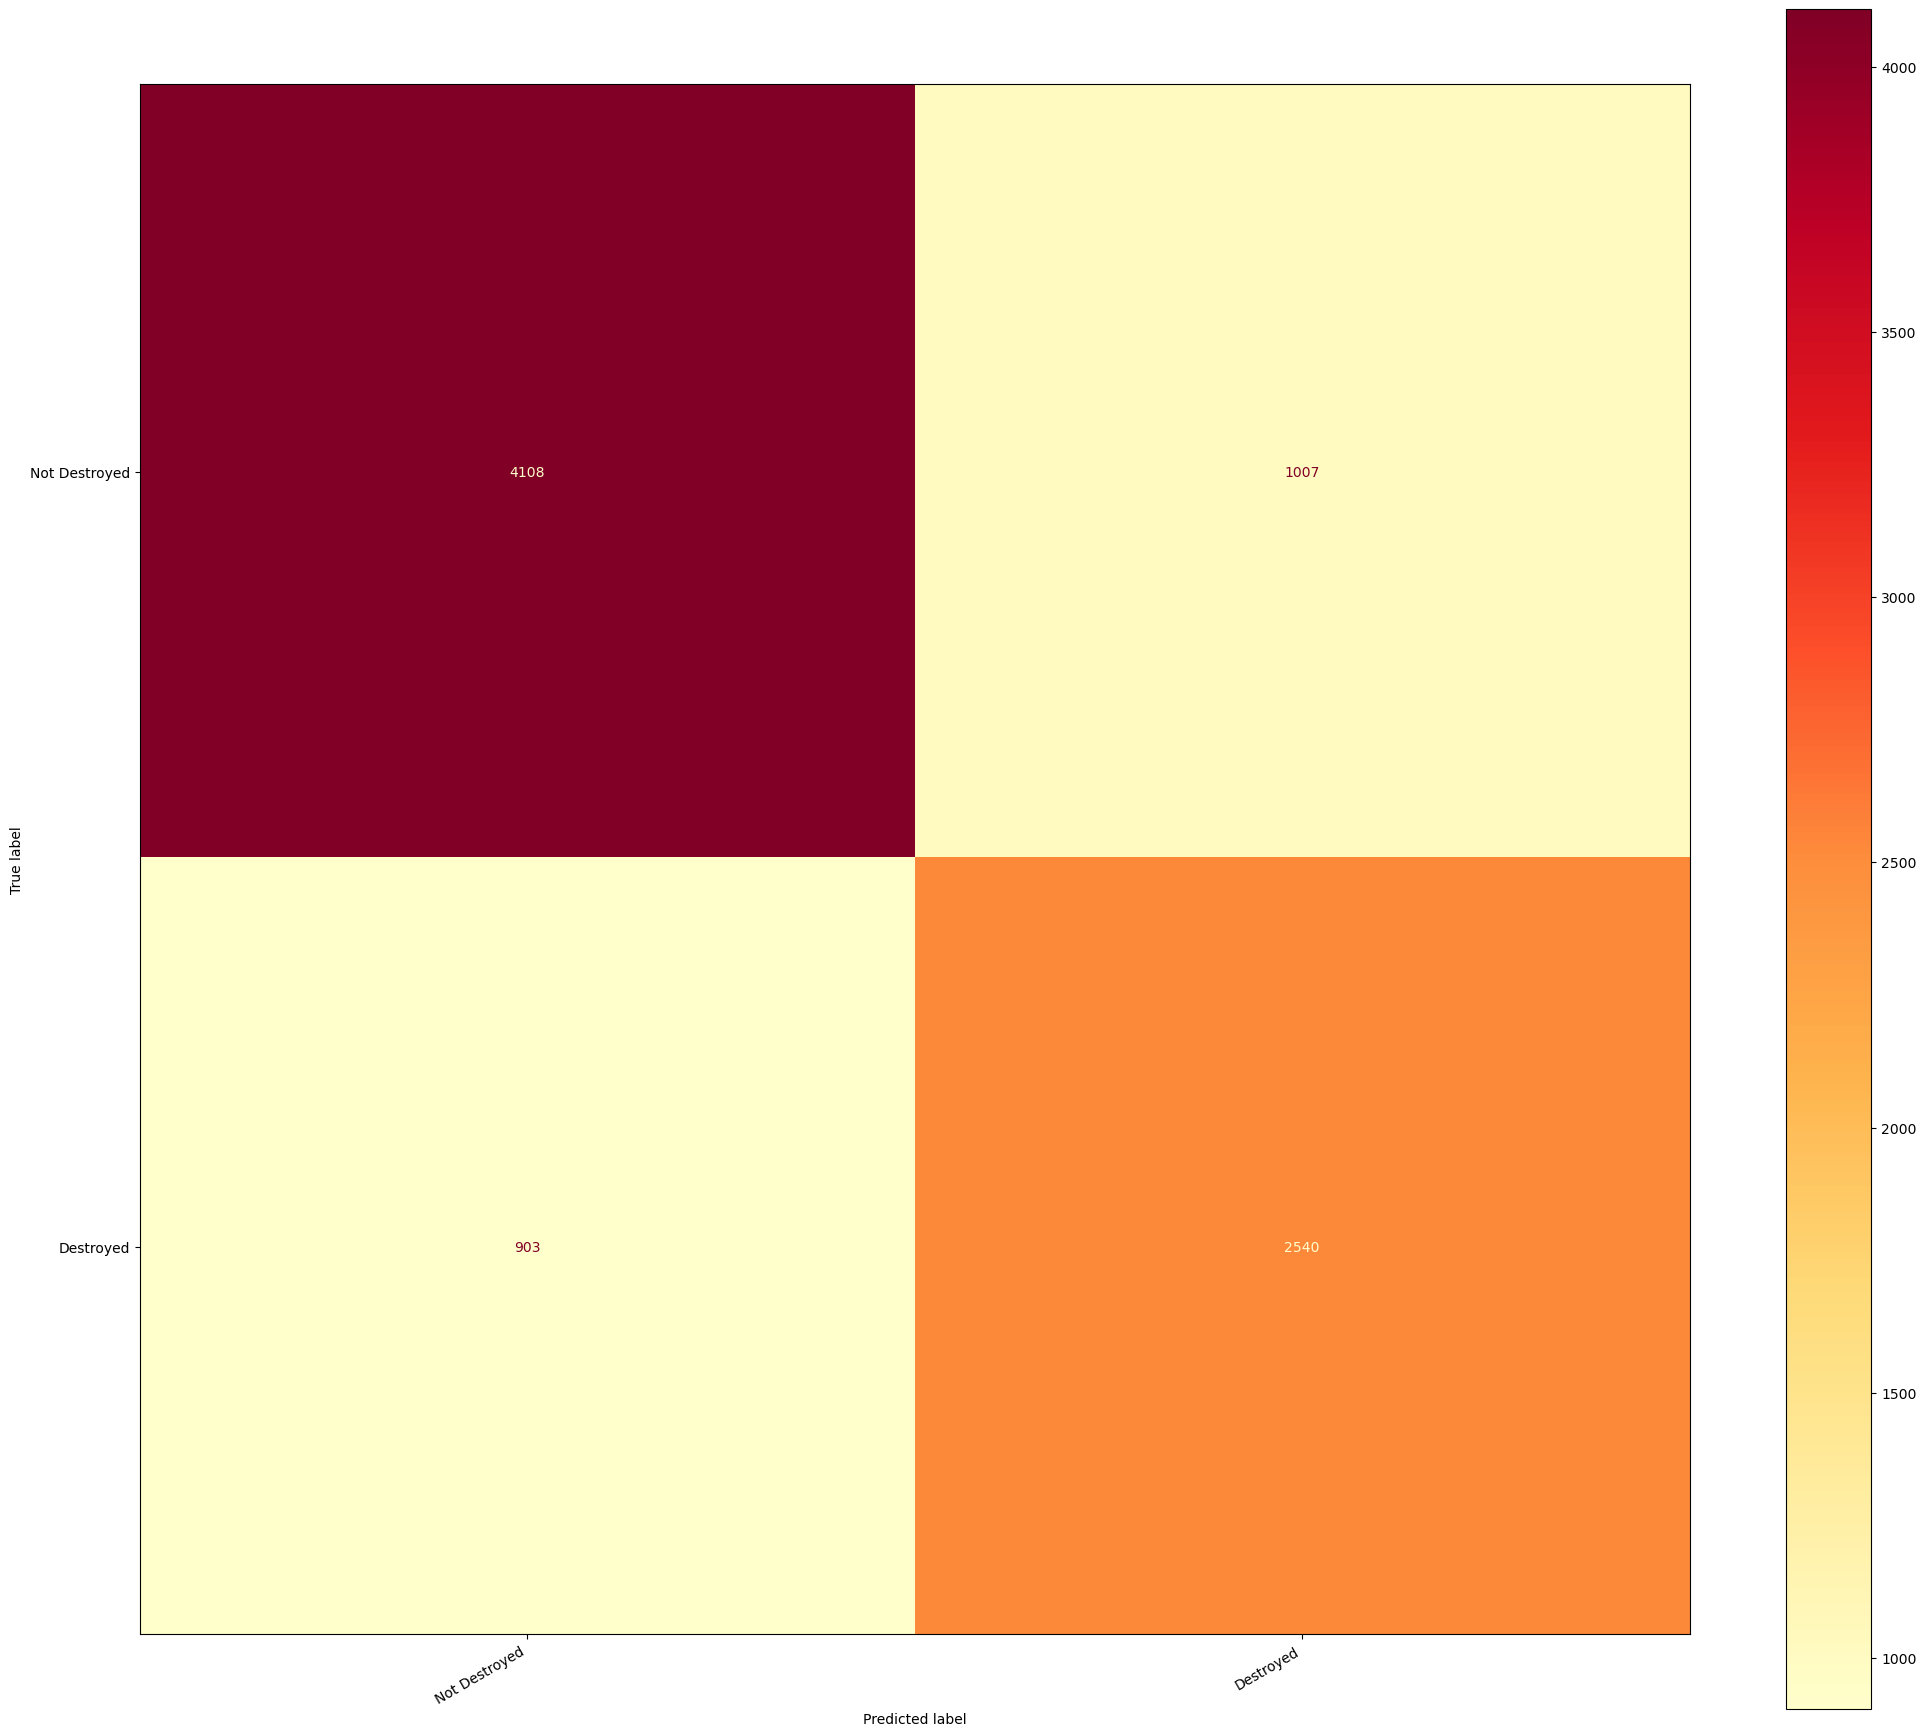

In [41]:
cm = confusion_matrix(fire_test.Destroyed, lr.predict(fire_test[features]))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Destroyed', 'Destroyed'])
fig, ax = plt.subplots(figsize=(25, 25))
disp.plot(ax=ax, cmap='YlOrRd')
fig.autofmt_xdate()
plt.show()


In [48]:
from IPython.display import display
feature_df = pd.DataFrame({'feature': cal_fire_data.columns[:-1], 'importance': lr.coef_.flatten()})
display(feature_df)



,feature,importance
0,Assessed Improved Value (parcel),-1.363348e-09
1,Latitude,6.018335e-01
2,Longitude,1.946007e-01
3,Age,1.090450e-02
4,Destroyed,-1.528672e-03
5,* Structure Type_Commercial Building Multi Story,3.750069e-04
6,* Structure Type_Commercial Building Single Story,-4.224934e-05
7,* Structure Type_Hospital,-4.782094e-04
8,* Structure Type_Infrastructure,-3.424392e-04
9,* Structure Type_Mixed Commercial/Residential,2.699170e-02
